#  Ciência dos Dados 
## Regressão Linear
- **Gabriel Brey**
- **Hugo Carl**
- **Rebeca Triñanes**

O projeto consiste em construir um modelo de regressão linear, com o objetivo de prever preços de casa em King County, Seattle. 

In [9]:
#importando as bibliotecas necessárias

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import math
from sklearn import datasets, linear_model
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image

## Base de Dados

In [4]:
#importando a base de dados

dados = pd.read_csv('kc_house_data.csv',sep=',')

In [5]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#restringindo a variável independente "preço" entre 1 milhão e 3 milhões
dados = dados.loc[(dados.price>=1000000) & (dados.price<3000000)]

In [7]:
#colocando uma nova variável no DataFrame
dados['lnprice'] = np.log(dados.price)

## Histograma do preço

#### Apenas para fins de visualização e uma melhor compreensão do dado que deseja-se analisar e prever.

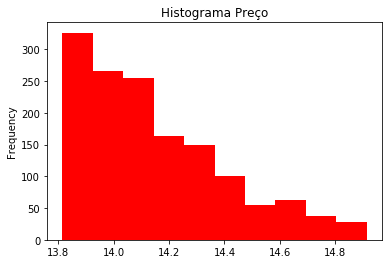

In [8]:
#plotando o histograma do preço

plot = dados.lnprice.plot.hist(color='red',title='Histograma Preço')

## Modelo de Regressão Linear Simples

### $$ln(y)=β0+β1x$$ 

- y é a variável independente (preço)
- x é a variável preditora (sqft_living)
- β0 é a intercepção
- β1 é o coeficiente para x

*É necessário utilizar o logaritmo do preço para diminuir a oscilação entre os dados, e assim, dar mais precisão ao modelo.*

### Relações entre as variáveis

In [25]:
#.fit() dá a função que representa a linha que melhor representa a relação entre a variável independente e dependente

housing_model = ols("lnprice ~ sqft_living", data=dados).fit()

In [26]:
housing_model_summary = housing_model.summary()

In [27]:
#transforma em modelo HTML os dados obtidos para uma melhor visualização

HTML(
housing_model_summary\
.as_html()\
)

- **Adj. R-squared** 
<p>Indica que 17.5% dos preços de casas podem ser explicados pela variável escolhida: Square Foot. </p>

- **coef**
<p> Representa a mudança na variável dependente resultando da mudança de 1 unidade da variável escolhida: β1 </p>
<p> Nesse caso, por se tratar de um modelo que considera o logaritmo do preço, usa-se o modelo Log-Lin, que diz que: <p> $$β1 = coef * 100%$$  $$β1 = 0.01$$ </p>
<p> *Ou seja, a cada aumento de 1 pé (sqft_living) o preço da casa aumenta em 0.01%.*

- **std.err** 
<p> Representa o erro padrão. Quanto maior o erro, menos preciso é o modelo. </p>

- **P>|t|** 
<p> Representa a probabilidade de um aumento de 0.01% no preço caso a variável escolhida aumente em 1 unidade, assumindo que não haja relação entre as duas variáveis; um valor de P baixo significa que os resultados são significantes, ou seja, que tem relação entre as variáveis. (P < 0.05) </p>


- **R-squared** 
<p> É um número entre 0 e 1; </p>
Representa a proporção de variância que é explicada pelo modelo. Quanto maior é, mais preciso é o modelo. 
<p> *Percebe-se que o R-squared desse modelo é baixo (0.176), pois é um modelo que considera apenas 1 variável.*

### Gráficos das relações

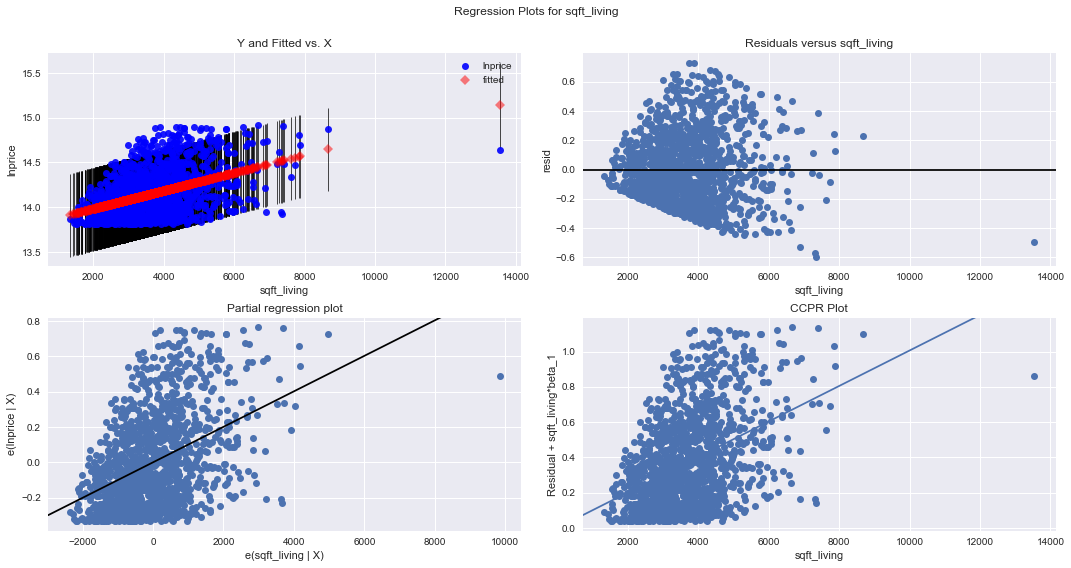

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(housing_model, "sqft_living", fig=fig)

- **Y and Fitted vs. X** plota a variável dependente com a variável escolhida. O relacionamento positivo entre as duas indica que quando uma variável aumenta, a outra também.
- **Residual versus sqft_living** plota o erro do modelo vs a variável escolhida. Cada ponto é um valor observado e a linha preta é a média desses valores. Como não há padrão entre a distância dos valores e da média, assume-se que o valor homoscedasticidade está ok.
- **Partial Regression plot** e **CCPR Plot** plotam a relação da variável dependente e da variável escolhida, levando em conta a adição de outras variáveis escolhidas (é uma predição que mais pra frente será confirmada ou negada). 

### Validação primária e confiança no modelo

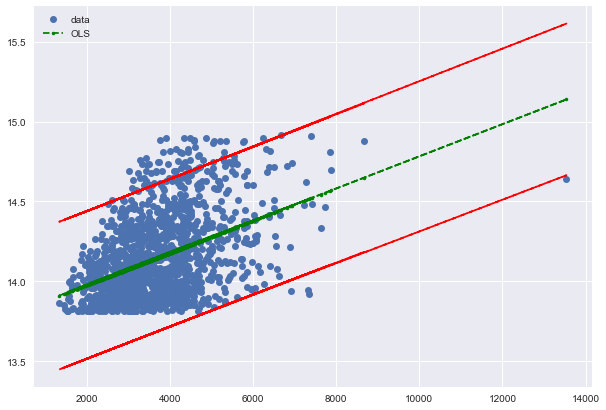

In [29]:
#plotando a trend line, os pontos e o intervalo de confiança
x = dados[['sqft_living']]
y = np.log(dados[['price']])

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, y, 'o', label="data")
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best');

No gráfico: 
<font color=red>1. Intervalo de confiança</font>

In [30]:
#intervalo de confiança pros coeficientes do modelo
housing_model.conf_int()

,0,1
Intercept,13.733047,13.819795
sqft_living,0.000089,0.000112


*Statsmodel calcula 95% de intervalo de confiança, ou seja, os coeficientes desse modelo tem 95% de chance de estarem entre o intervalo das colunas 1 e 0, especificados na tabela acima.*

<font color=green>2. Trend line:</font> a linha que melhor correlaciona os pontos
<font color=blue>3. Pontos</font> (dados)

## Modelo de Regressão Linear Múltipla

### $$y=β0+β1x1+β2x2...+βnxn$$

*São n modelos de regressão linear simples, que consideram a relação de n variáveis preditoras com a variável independente.*

### Relações entre as variáveis

In [45]:
#usando .fit() em mais variáveis para melhor entender o modelo

housing_model2 = ols("""lnprice ~ sqft_living 
                                + grade 
                                + view
                                + floors
                                + lat""", data=dados).fit()

In [46]:
housing_model2_summary = housing_model2.summary()

In [47]:
#transformando em HTML para melhor visualização

HTML(
housing_model2_summary\
.as_html()\
)

- **coef:**
<p> $$β1 = coef * 100%$$ </p>

<p> *A cada aumento de 1 unidade em grade o preço da casa aumenta em 3,51%.* </p>
<p> *A cada aumento de 1 unidade em view o preço da casa aumenta em 3,40%.* </p>
<p> *A cada variação de 1 unidade lat o preço da casa aumenta em 32,93%.* </p>
<p> *No caso dos andares a variação se mostra muito baixa -0,82% por andar, podemos tornar essa variável irrelavente* </p>

### Validação do modelo
#### Cálculo do RMSE (Root Mean Squared Error)

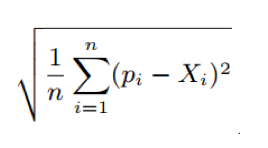

In [50]:
#fórmula
Image("RMSE.png")

É importante para validar a qualidade do modelo. Como o RMSE é a raiz quadrada da média do quadrado dos erros, como explicitado acima, quanto menor for seu valor, mais preciso é o modelo. 
<p> Tendo em mente o intervalo de dados que o modelo considera, um RMSE considerado bom para um intervalo de 0 até 1 seria diferente de um para um intervalo de 100.000 até 1.000.000. </p>

In [36]:
#calculando o RMSE 

X = dados[['sqft_living', 'grade', 'view', 'floors', 'lat']]
y = dados.price

#splitando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#instanciando o modelo
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

#fazendo a predição
y_pred = lm2.predict(X_test)

#RMSE
print('O RMSE é:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

O RMSE é: 357860.923407


*O RMSE está aceitável visto que o intervalo do modelo é de 2.000.000*

### Gráficos das relações

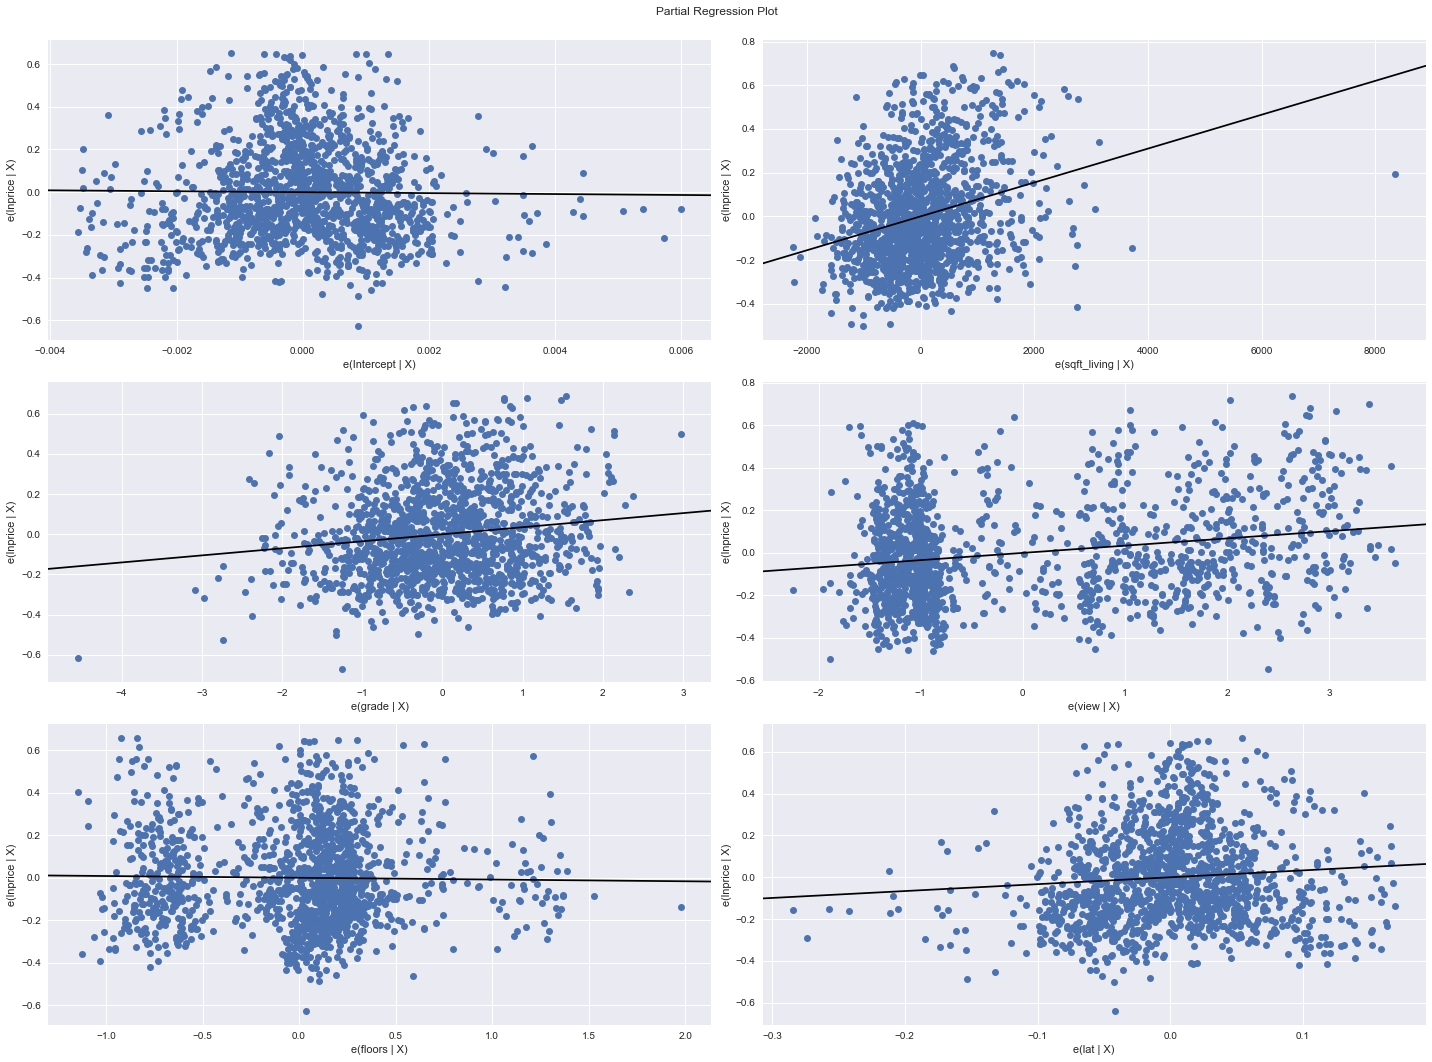

In [34]:
#plotando os gráficos de regressão linear para cada variável, levando em conta todas as outras variáveis

fig = plt.figure(figsize=(20,15))
fig = sm.graphics.plot_partregress_grid(housing_model2, fig=fig)

## Conclusão

Com o método da regressão linear podemos observar o comportamento da variável independente 'preço' com diferentes variáveis dependentes relacionadas por meio de uma reta ajustada linearmente.
<P> Podemos observar que no caso da variável "floors" (andares) a reta está paralela ao eixo X, o que nos mostra que incrementos na váriavel floors não afetam em nada o preço das casas, correlação é próxima a 0, bem como tem um alto p-value (0.526). </p> <p> As variáveis grade, view e lat nos mostram uma correlação positiva, apesar do coeficiente angular da reta ser pequeno, aumentos positivos em X aumentam o Y (preço), afetando positivamente o modelo. </p> <p> A coluna sqft_living, que é o tamanho da casa em pés quadrados, é a váriavel que mais pesa para o panorama geral de preços das casas em King County, Seattle. Um aumento de 1 pé quadrado no tamanho da casa equivale a um aumento de 0.01% no valor do imóvel. É válido fazer uma análise direta entre as duas variáveis dado que Seattle é uma cidade já extremamente urbanizada onde uma casa com um tamanho maior tem grande chances de custar mais caro do que uma menor. </p>

## Trabalho em equipe

Trabalho em equipe não evidênciado pelo github pois, trabalhamos a maior parte em jupyter e usamos facebook, e-mail e Whatsapp para compartilhar informações e unir partes do trabalho, Rebeca ficou responsável pela maior parte do código e modelagem no jupyter, Hugo trabalhou a parte da explicação do panorama geral do modelo e conclusão, e ajudou Rebeca com partes do código, e Gabriel ajudou na parte operacional e na finalização, quando solicidado.